In [22]:
# Import dependencies
import requests
import numpy as np
import pandas as pd
from rapidconnect import RapidConnect
import json
from bs4 import BeautifulSoup
from wordfreq import word_frequency
from wordfreq import zipf_frequency
from wordfreq import top_n_list
import matplotlib.pyplot as plt
%matplotlib inline
import collections
import os
 

# pip install unirest
#import unirest

rapid = RapidConnect('music-analysis_5b91cd1ee4b02d6cfa6a0c0a', '/connect/auth/music-analysis_5b91cd1ee4b02d6cfa6a0c0a')


In [ ]:
response = requests.get("https://rokity-mashape-v1.p.mashape.com/?query=explore",
  headers={
    "X-Mashape-Key": "5Ya5l2DMxnmsh6gIVvXOUbP6tTMjp1CIPeujsngGr9TxIM3Zv5",
    "X-Mashape-Host": "rokity-mashape-v1.p.mashape.com"
  }
)

In [ ]:
word_url = "https://wordsapiv1.p.mashape.com/words/time"
bearer_token = "82a7033c-3bbf-4e42-9d90-28cc8e69df31"
genius_headers =  headers={
    "X-Mashape-Key": "5Ya5l2DMxnmsh6gIVvXOUbP6tTMjp1CIPeujsngGr9TxIM3Zv5",
    "Accept": "application/json"
  }
word_frequency_url = word_url + "/frequency"

In [ ]:
genius_search_url

In [ ]:
word_frequency('cafe', 'en')

In [ ]:
zipf_frequency('cafe', 'en')

In [ ]:
top_n_list('en', 10)

In [ ]:
dataframe_base_path = "../Data_Files/Play_Lists/"

dataframe_names = ["today_top_hits", "rap_caviar", "mint", "rock_this", "are_and_be", 
             "viva_latino", "hot_country", "new_music_friday_malaysia",
             "viral_hits", "fresh_finds", "global_top_50", "united_states_top_50",
             "global_viral_50", "united_states_viral_50"]

In [ ]:
dataframe_names

In [ ]:
wordstring = 'it was the best of times it was the worst of times '
wordstring += 'it was the age of wisdom it was the age of foolishness'

wordlist = wordstring.split()

wordfreq = []
for w in wordlist:
    wordfreq.append(wordlist.count(w))

print("String\n" + wordstring +"\n")
print("List\n" + str(wordlist) + "\n")
print("Frequencies\n" + str(wordfreq) + "\n")
print("Pairs\n" + str(zip(wordlist, wordfreq)))

In [12]:
# Read input file, note the encoding is specified here 
# It may be different in your text file


# List of playlist names
playlists = ["todays_top_hits", "rap_caviar", "mint", "rock_this", "are_and_be",
             "viva_latino", "hot_country", "new_music_friday_malaysia",
             "viral_hits", "fresh_finds", "global_top_50", "united_states_top_50",
             "global_viral_50", "united_states_viral_50"]

# Initialize empty data frame
sentiment_df = pd.DataFrame()

# Iterate through playlists
for playlist in playlists:
    # Read in playlist .csv file
    print(f"Playlist: {playlist}")
    print("------------------------")
    pl_csv_path = f"../Data_Files/Play_Lists/{playlist}.csv"
    pl_csv = pd.read_csv(pl_csv_path)
    pl_csv = pl_csv.drop("Unnamed: 0", axis = 1)

file = open('../Data_Files/Song_Lyrics/are_and_be/Addicted_VanJess.txt', encoding="utf8")
a= file.read()

Playlist: todays_top_hits
------------------------
Playlist: rap_caviar
------------------------
Playlist: mint
------------------------
Playlist: rock_this
------------------------
Playlist: are_and_be
------------------------
Playlist: viva_latino
------------------------
Playlist: hot_country
------------------------
Playlist: new_music_friday_malaysia
------------------------
Playlist: viral_hits
------------------------
Playlist: fresh_finds
------------------------
Playlist: global_top_50
------------------------
Playlist: united_states_top_50
------------------------
Playlist: global_viral_50
------------------------
Playlist: united_states_viral_50
------------------------


In [13]:
stopwords = set(line.strip() for line in open('stopwords.txt'))
stopwords = stopwords.union(set(['mr','mrs','one','two','said']))

In [14]:
wordcount = {}

In [15]:
for word in a.lower().split():
    word = word.replace(".","")
    word = word.replace(",","")
    word = word.replace(":","")
    word = word.replace("\"","")
    word = word.replace("!","")
    word = word.replace("â€œ","")
    word = word.replace("â€˜","")
    word = word.replace("*","")
    if word not in stopwords:
        if word not in wordcount:
            wordcount[word] = 1
        else:
            wordcount[word] += 1

In [16]:
# Print most common word
n_print = int(input("How many most common words to print: "))
print("\nOK. The {} most common words are as follows\n".format(n_print))
word_counter = collections.Counter(wordcount)
for word, count in word_counter.most_common(n_print):
    print(word, ": ", count)

How many most common words to print: 10

OK. The 10 most common words are as follows

you :  23
and :  11
i'm :  11
i :  10
need :  10
me :  10
what :  8
every :  8
the :  8
in :  8


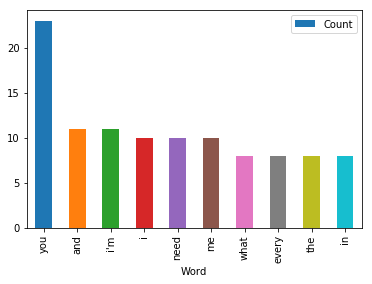

In [17]:
lst = word_counter.most_common(n_print)
df = pd.DataFrame(lst, columns = ['Word', 'Count'])
df.plot.bar(x='Word',y='Count')

In [24]:
filenames = ['../Data_Files/Song_Lyrics/are_and_be/Addicted_VanJess.txt', '../Data_Files/Song_Lyrics/are_and_be/AfterDark_Drake.txt', ...]
with open('output.txt', 'w') as outfile:
    for fname in filenames:
        with open(fname) as infile:
            outfile.write(infile.read())

TypeError: expected str, bytes or os.PathLike object, not ellipsis